# 로지스틱 회귀
- 선형 회귀를 사용하는 **분류 모델**

## 키워드 정리

### 1. 로지스틱 회귀
- 선형 회귀를 이용한 분류 모델

### 2. 다중 분류
- 이진분류 (활성화 함수: sigmoid function)
- 다중분류 (활성화 함수: softmax function)

### 3. 시그모이드 함수

### 4. 소프트맥스 함수

## 핵심 패키지와 함수

### 1. scikit-learn (사이킷런)
1) LogisticRegression
2) predict_proba()
3) decision_function()

In [3]:
import pandas as pd

df = pd.read_csv('https://bit.ly/fish_csv_data')
df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [4]:
fish_target =  df['Species'].to_numpy()
fish_data = df[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [ ]:
import numpy as np
np.unique(fish_target)  # '중복 없는' fish_target 데이터

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [6]:
# 이진 분류
bream_smelt_indexes = (fish_target == 'Bream') | (fish_target == 'Smelt')  # 도미와 방어의 위치 인덱스(True)

bream_smelt_data = fish_data[bream_smelt_indexes]
bream_smelt_target = fish_target[bream_smelt_indexes]

In [7]:
# 도미 + 방어 데이터를 훈련 세트와 테스트 세트로 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    bream_smelt_data, bream_smelt_target, test_size=0.2, random_state=42
)

In [9]:
# 정규화 / 표준점수
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()                     # 1 스케일러 객체 생성
ss.fit(train_input)                       # 2 훈련 세트를 기준으로 학습
train_scaled = ss.transform(train_input)  # 3 훈련 세트 변환
test_scaled = ss.transform(test_input)    # 4 테스트 세트 변환

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [13]:
lr.predict(test_scaled[:5])

array(['Bream', 'Smelt', 'Smelt', 'Smelt', 'Bream'], dtype=object)

In [14]:
print("가중치:", lr.coef_, "절편:", lr.intercept_)

가중치: [[-0.5797041  -0.79455331 -0.82924317 -0.87264391 -0.83010333]] 절편: [-2.67761067]


In [16]:
decision = lr.decision_function(test_scaled[:5])  # 선형 방정식의 해
decision

array([-4.10850822,  2.96110512,  2.27684934,  2.98159881, -5.12296946])

In [ ]:
# decision -> 확률로 만들기 위해 0~1 사이의 값으로 만든다 (sigmoid function 적용)
from scipy.special import expit
print(decision)
print("\t\t\t  ⭣")
print(expit(decision))

[-4.10850822  2.96110512  2.27684934  2.98159881 -5.12296946]
			  ⭣
[0.01616662 0.95078573 0.90694148 0.95173587 0.00592301]


[-5.00000000e+00 -4.90000000e+00 -4.80000000e+00 -4.70000000e+00
 -4.60000000e+00 -4.50000000e+00 -4.40000000e+00 -4.30000000e+00
 -4.20000000e+00 -4.10000000e+00 -4.00000000e+00 -3.90000000e+00
 -3.80000000e+00 -3.70000000e+00 -3.60000000e+00 -3.50000000e+00
 -3.40000000e+00 -3.30000000e+00 -3.20000000e+00 -3.10000000e+00
 -3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -1.77635684e-14  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00  1.10000

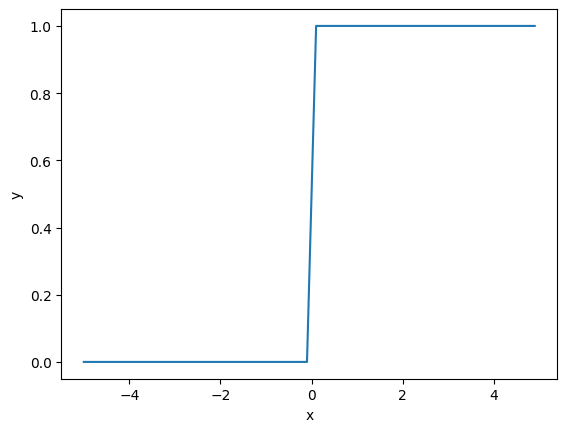

In [33]:
import matplotlib.pyplot as plt

x = np.arange(-5, 5, 0.1)
print(z)

k = 100  # 스케일 조절 — 값이 클수록 곡선이 더 가파름
y = expit(k * x)

# y = 1 / (1 + np.exp(-z))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()